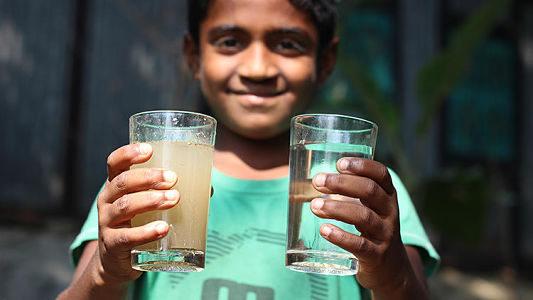

# Introduction

**Declining water quality has become a global issue of concern as human populations grow, industrial and agricultural activities expand, and climate change threatens to cause major alterations to the hydrological cycle. ... Poor water quality has a direct impact on water quantity in a number of ways.**

>>> *This dataset will bring us some insights towards factor which are responsible for potability of water, so lets dive in*

### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies,across various columns described below:

**1. pH value** :  WHO has recommended maximum permissible limit of pH from 6.5 to 8.5

**2. Hardness**: Hardness is mainly caused by calcium and magnesium salts.

**3. Solids (Total dissolved solids - TDS)**:Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines**: Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:** It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:** According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:** According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:** THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:** The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

#### Importing basic Libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv("../input/water-potability/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


***lets see some descriptive stats of our dataset***

In [3]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
data.shape

(3276, 10)

In [5]:
data["Potability"].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

*our dataset is not heavily imbalanced , having a ratio of 60/40*

# EDA

**lets get some visual insights from our dataset** 

<AxesSubplot:xlabel='Potability', ylabel='count'>

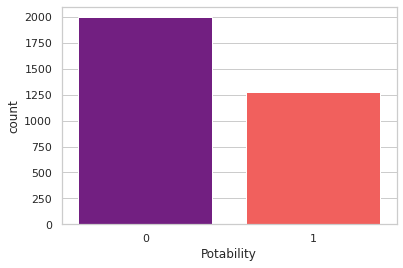

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Potability",data=data,saturation=1,palette="magma")

In [7]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<AxesSubplot:>

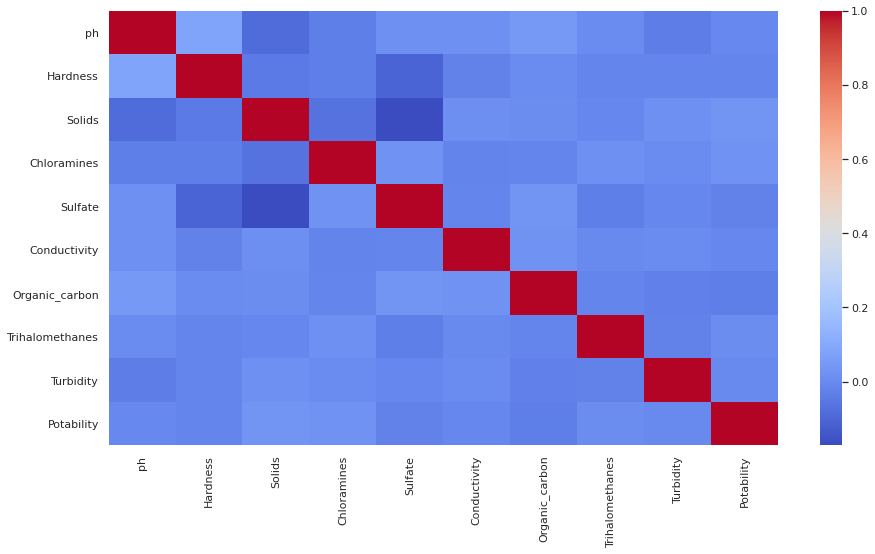

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='coolwarm')

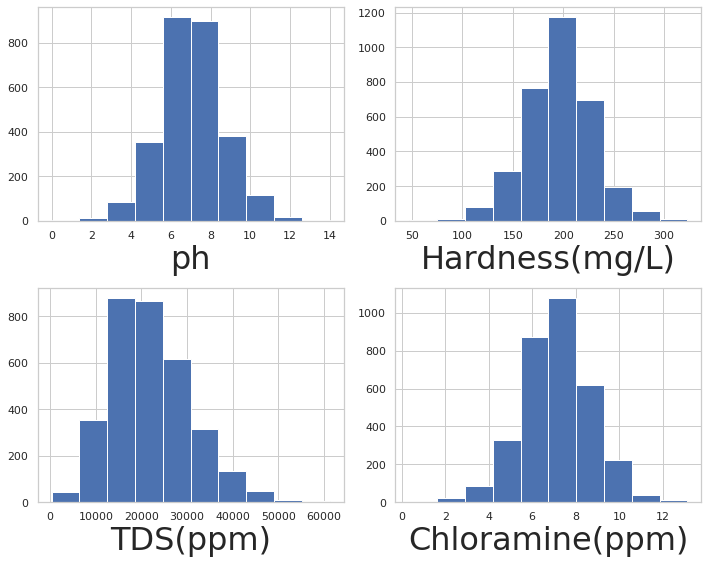

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))

ax1.hist(data["ph"])
ax1.set_xlabel("ph",fontsize=32)
ax2.hist(data["Hardness"])
ax2.set_xlabel("Hardness(mg/L)",fontsize=32)
ax3.hist(data["Solids"])
ax3.set_xlabel("TDS(ppm)",fontsize=32)
ax4.hist(data["Chloramines"])
ax4.set_xlabel("Chloramine(ppm)",fontsize=32)
plt.tight_layout()






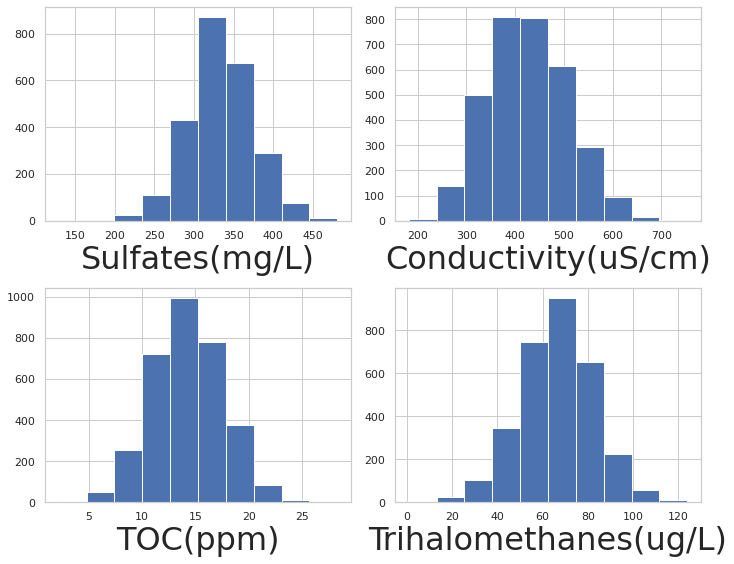

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,8))

ax1.hist(data["Sulfate"])
ax1.set_xlabel("Sulfates(mg/L)",fontsize=32)
ax2.hist(data["Conductivity"])
ax2.set_xlabel("Conductivity(uS/cm)",fontsize=32)
ax3.hist(data["Organic_carbon"])
ax3.set_xlabel("TOC(ppm)",fontsize=32)
ax4.hist(data["Trihalomethanes"])
ax4.set_xlabel("Trihalomethanes(ug/L)",fontsize=32)
plt.tight_layout()


>>> **Its good to notice that our features are quiet normally distributed**

## Feature Engineering

##### Lets check if our dataset contains some missing values or not

In [11]:
data.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

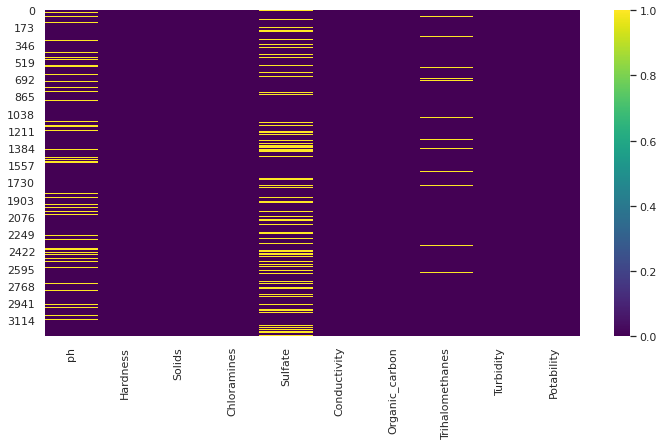

In [12]:
sns.heatmap(data.isnull(),cmap="viridis")
plt.gcf().set_size_inches(12,6)


**Some of our features are having missing values lets deal with them**

#### 1.PH

7.080794504276819


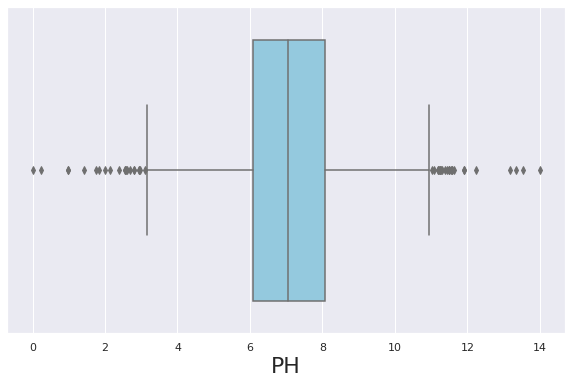

In [13]:
sns.set_style("darkgrid")
sns.boxplot(x="ph",data=data,color="skyblue")
plt.xlabel("PH",fontsize=22)
print(data.ph.mean())
plt.gcf().set_size_inches(10,6)

>>> **The mean value of ph comes around 7 , and as PH is normally distributed we will fill missing values with the mean**

In [14]:
data.ph=data.ph.fillna(data.ph.mean())

#### 2.Sulfates

333.7757766108134


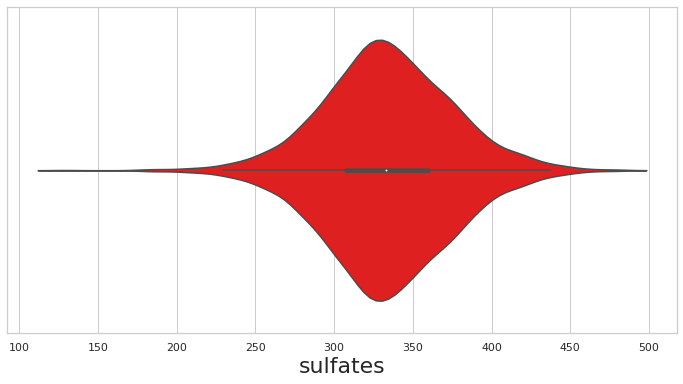

In [15]:
sns.set_style("whitegrid")
sns.violinplot(x="Sulfate",data=data,color="red")
plt.xlabel("sulfates",fontsize=22)
print(data.Sulfate.mean())
plt.gcf().set_size_inches(12,6)

In [16]:
data.Sulfate=data.Sulfate.fillna(data.Sulfate.mean())

#### 3.Trihalomethanes

66.39629294676803


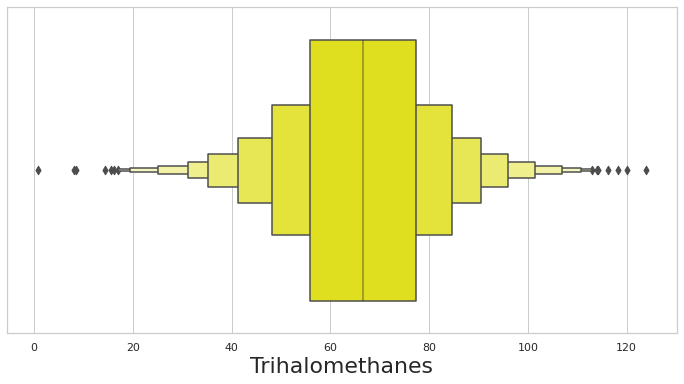

In [17]:
sns.set_style("whitegrid")
sns.boxenplot(x="Trihalomethanes",data=data,color="yellow")
plt.xlabel("Trihalomethanes",fontsize=22)

print(data.Trihalomethanes.mean())
plt.gcf().set_size_inches(12,6)

In [18]:
data.Trihalomethanes=data.Trihalomethanes.fillna(data.Trihalomethanes.mean())

In [19]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

*Now our dataset is not having any missing values*

In [20]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data PreProcessing & Feature Scaling

In [21]:
targets = data["Potability"]
features = data.drop("Potability",axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
scaled_features = scaler.transform(features)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_features,targets,test_size=0.35,random_state=42)

>>> **Now our dataset is  preprocessed & ready for model creation**

# Model Selection

#### Lets see visualizations which will help us to choose best model for our dataset

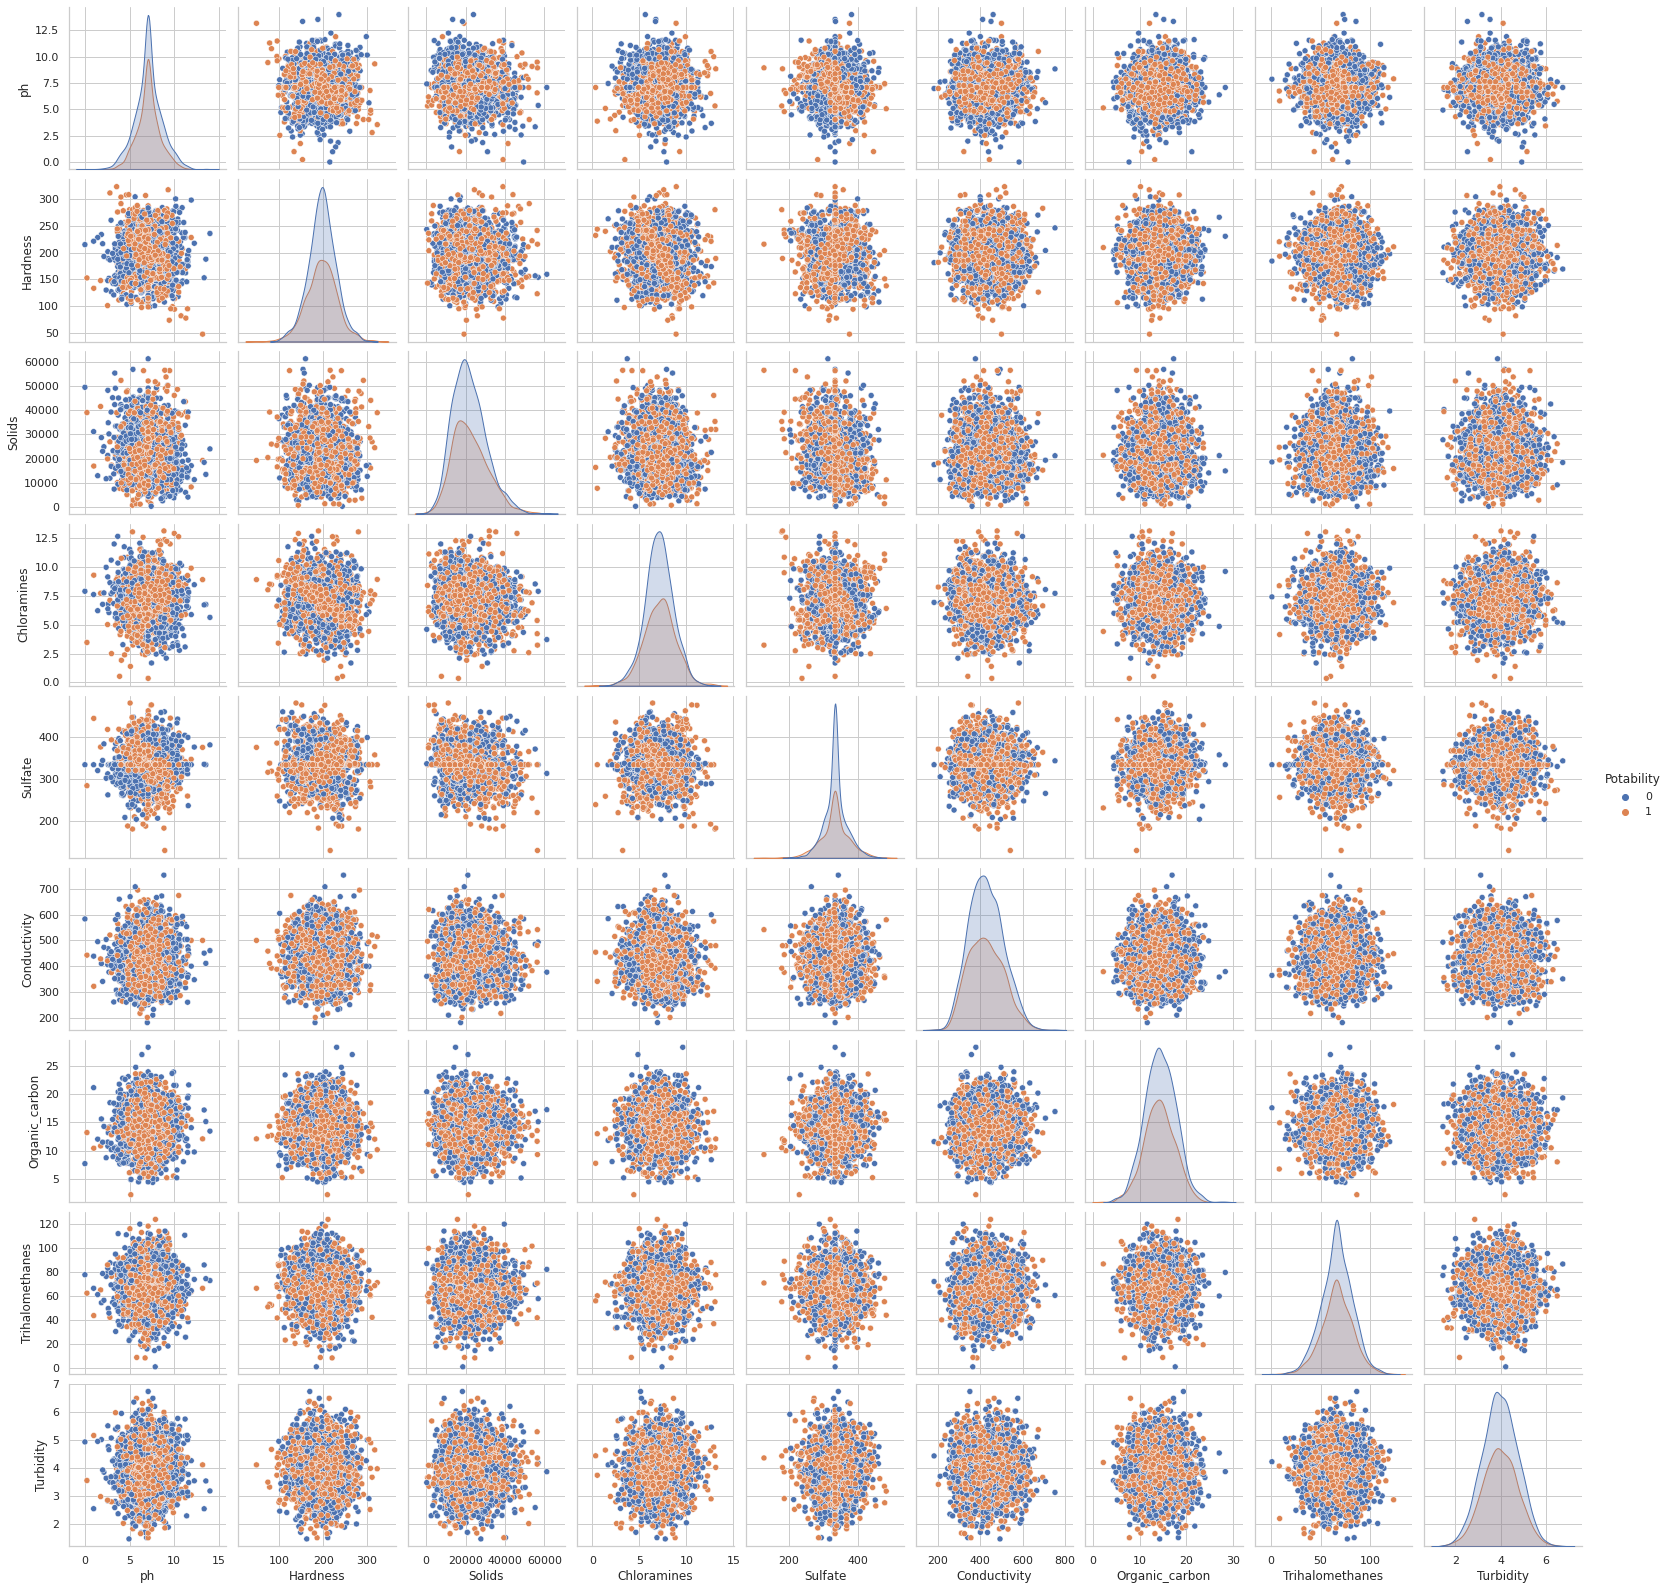

In [24]:
sns.pairplot(data,hue = 'Potability')

### Some of the important points to be considered before choosing models:
#### Its a classification problem
#### With above visualization we can notice the classes are highly overlapped, so choosing a linear model such as logistic regression might not be a wise choice

>**Having said that lets screen and train our model on 4 MACHINE LEARNING models** :
   #### Decision Tree
   #### Random Forest
   #### SVM
   #### Xgboost 

# 1.Decision Trees 



In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier().fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[451 272]
 [227 197]]


              precision    recall  f1-score   support

           0       0.67      0.62      0.64       723
           1       0.42      0.46      0.44       424

    accuracy                           0.56      1147
   macro avg       0.54      0.54      0.54      1147
weighted avg       0.57      0.56      0.57      1147



# 2.Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(100).fit(x_train,y_train)
predictions = rfc.predict(x_test)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[639  84]
 [274 150]]


              precision    recall  f1-score   support

           0       0.70      0.88      0.78       723
           1       0.64      0.35      0.46       424

    accuracy                           0.69      1147
   macro avg       0.67      0.62      0.62      1147
weighted avg       0.68      0.69      0.66      1147



# 3.SVM

In [29]:
from sklearn.svm import SVC
svc= SVC().fit(x_train,y_train)
predictions = svc.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[666  57]
 [300 124]]


              precision    recall  f1-score   support

           0       0.69      0.92      0.79       723
           1       0.69      0.29      0.41       424

    accuracy                           0.69      1147
   macro avg       0.69      0.61      0.60      1147
weighted avg       0.69      0.69      0.65      1147



# 4.Xgboost

In [31]:
import xgboost
classifier= xgboost.XGBClassifier()
classifier.fit(x_train,y_train)
predictions = classifier.predict(x_test)

[05:56:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[566 157]
 [242 182]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.74       723
           1       0.54      0.43      0.48       424

    accuracy                           0.65      1147
   macro avg       0.62      0.61      0.61      1147
weighted avg       0.64      0.65      0.64      1147



# HyperParameter Tuning

>>> **Lets see we can increase model accuracy with optimization or not , we will choose xgboost and try to impliment**

### Randomized Search CV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50,100,250,500,750,1000,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
min_child_weight =[1,2,3,4,5]
learning_rate = [0.05,0.1,0.15,0.20]

hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'booster':booster,
    'min_child_weight':min_child_weight,
    'learning_rate':learning_rate    
}



In [34]:
xgrf = RandomizedSearchCV(estimator=classifier,param_distributions=hyperparameter_grid,n_iter=50,cv=3,
                          random_state=42,verbose=0)
                          



In [35]:
xgrf.fit(x_train,y_train)

[05:56:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale

In [36]:
xgrf2 = xgrf.best_estimator_
predictions = xgrf2.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[648  75]
 [307 117]]


              precision    recall  f1-score   support

           0       0.68      0.90      0.77       723
           1       0.61      0.28      0.38       424

    accuracy                           0.67      1147
   macro avg       0.64      0.59      0.58      1147
weighted avg       0.65      0.67      0.63      1147



#### we can see that the accuracy has increased a bit.

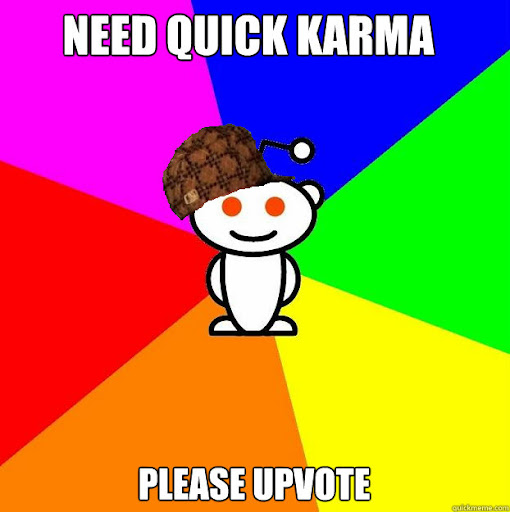